In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV data
df = pd.read_csv("metrics.csv")

# Separate the data for Stack and Heap allocations
heap_data = df[df["Grid Memory Allocation"].str.contains("Stack")]
stack_data = df[df["Grid Memory Allocation"].str.contains("Heap")]

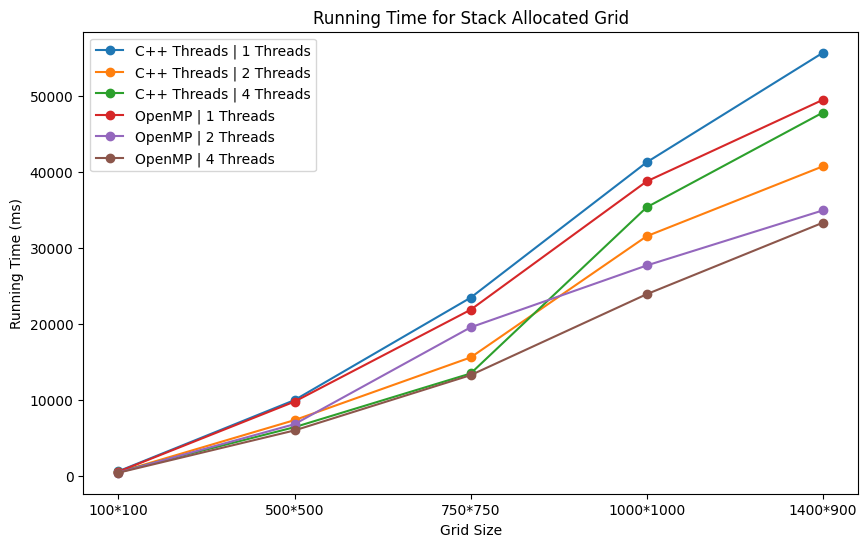

In [2]:
# Line graph for Stack Allocated Data
plt.figure(figsize=(10, 6))

for index, row in stack_data.iterrows():
    plt.plot(row["100*100":"1400*900"], label=f"{row['Setup']} | {row['Threads']} Threads", marker='o')

plt.title('Running Time for Stack Allocated Grid')
plt.xlabel('Grid Size')
plt.ylabel('Running Time (ms)')
plt.legend()
plt.show()

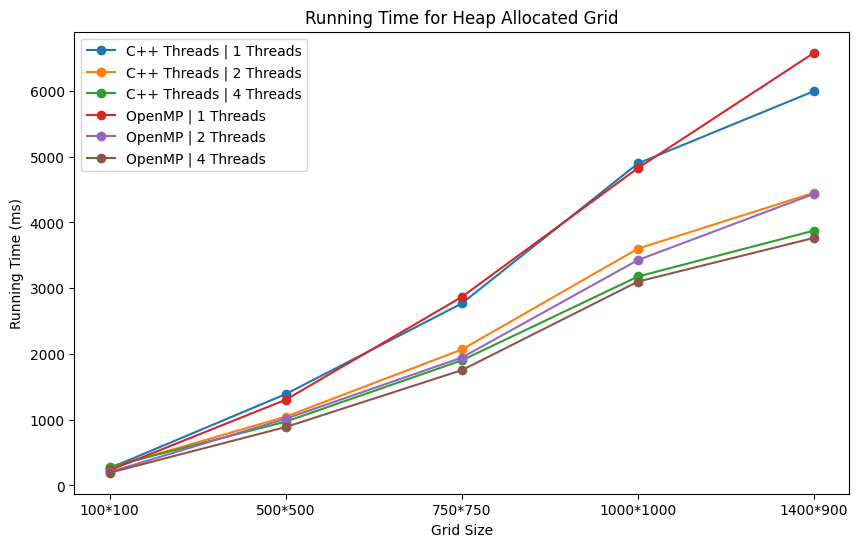

In [3]:
# Line graph for Stack Allocated Data
plt.figure(figsize=(10, 6))

for index, row in heap_data.iterrows():
    plt.plot(row["100*100":"1400*900"], label=f"{row['Setup']} | {row['Threads']} Threads", marker='o')

plt.title('Running Time for Heap Allocated Grid')
plt.xlabel('Grid Size')
plt.ylabel('Running Time (ms)')
plt.legend()
plt.show()

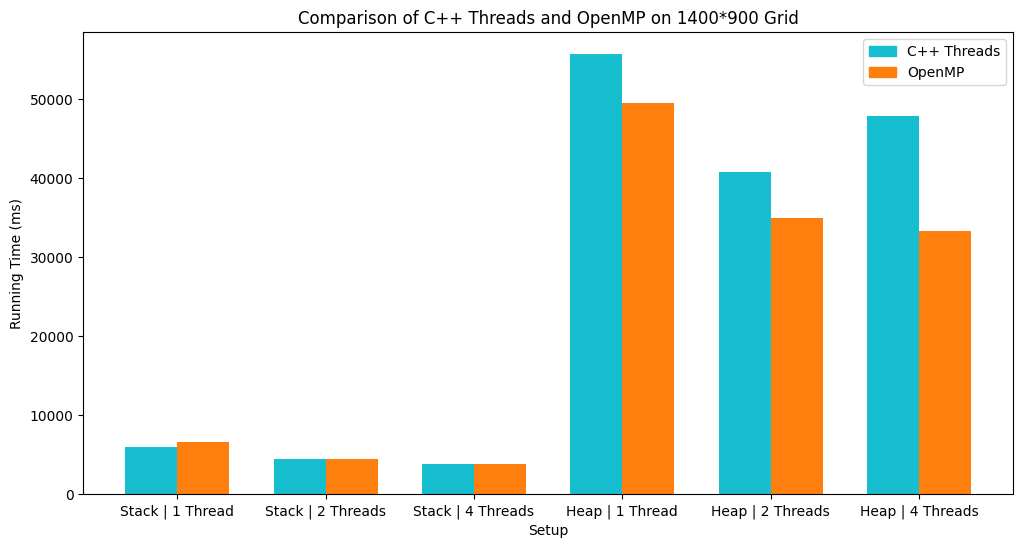

In [5]:
from matplotlib import patches

# Separate the data for C++ Threads and OpenMP
cpp_threads_data = df[df["Setup"].str.contains("C\+\+ Threads")]
openmp_data = df[df["Setup"].str.contains("OpenMP")]

bar_width = 0.35  # Adjust the width of the bars

plt.figure(figsize=(12, 6))

# Plot bars for C++ Threads
for index, row in cpp_threads_data.iterrows():
    plt.bar(index - bar_width/2, row['1400*900'], width=bar_width, color="tab:cyan")

# Plot bars for OpenMP
for i, (_, row) in enumerate(openmp_data.iterrows(), 0):
    plt.bar(i + bar_width/2, row['1400*900'], width=bar_width, color="tab:orange")

plt.title('Comparison of C++ Threads and OpenMP on 1400*900 Grid')
plt.xlabel('Setup')
plt.ylabel('Running Time (ms)')
plt.xticks(range(6), ['Stack | 1 Thread', 'Stack | 2 Threads', 'Stack | 4 Threads', 'Heap | 1 Thread', 'Heap | 2 Threads', 'Heap | 4 Threads'])

cpp_threads_label = patches.Patch(color='tab:cyan', label='C++ Threads')
openmp_label = patches.Patch(color="tab:orange", label="OpenMP")
plt.legend(handles=[cpp_threads_label, openmp_label])
plt.show()
